In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
%matplotlib inline

In [4]:
edu=pd.read_csv("fiuba_1_postulantes_educacion.csv")
edu.head(5)

,idpostulante,nombre,estado
0,NdJl,Posgrado,En Curso
1,8BkL,Universitario,En Curso
2,1d2B,Universitario,En Curso
3,NPBx,Universitario,En Curso
4,NPBx,Master,En Curso


In [5]:
gen=pd.read_csv("fiuba_2_postulantes_genero_y_edad.csv")
gen.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [6]:
vis=pd.read_csv("fiuba_3_vistas.csv")
vis.head()

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [7]:
post=pd.read_csv("fiuba_4_postulaciones.csv")
post.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [8]:
aon=pd.read_csv("fiuba_5_avisos_online.csv")
aon.head()

,idaviso
0,1112355872
1,1112335374
2,1112374842
3,1111984070
4,1111822480


In [9]:
ade=pd.read_csv("fiuba_6_avisos_detalle.csv")
ade.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


# Analizar la distribución de postulaciones a avisos según la fecha, dia del mes, dia de la semana, etc.
#Algunas de las preguntas que podrían plantearse son: Se recibe un volumen de postulaciones similar cualquier dia de
    la semana? Existen variaciones según el mes del año, o aun dentro del mes? Etc. 
Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales, 
y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda.  


In [10]:
#Se recibe un volumen de postulaciones similar cualquier dia de la semana
post.dropna()
post.fechapostulacion= pd.to_datetime(post.fechapostulacion, errors='coerce')

post["month"]=post.fechapostulacion.dt.month
post["day"]=post.fechapostulacion.dt.day
post["weekday"]=post.fechapostulacion.dt.weekday_name
post["weekday_"]=post.fechapostulacion.dt.weekday
post["date"]=post.fechapostulacion.dt.date
post.head()

,idaviso,idpostulante,fechapostulacion,month,day,weekday,weekday_,date
0,1112257047,NM5M,2018-01-15 16:22:34,1,15,Monday,0,2018-01-15
1,1111920714,NM5M,2018-02-06 09:04:50,2,6,Tuesday,1,2018-02-06
2,1112346945,NM5M,2018-02-22 09:04:47,2,22,Thursday,3,2018-02-22
3,1112345547,NM5M,2018-02-22 09:04:59,2,22,Thursday,3,2018-02-22
4,1112237522,5awk,2018-01-25 18:55:03,1,25,Thursday,3,2018-01-25


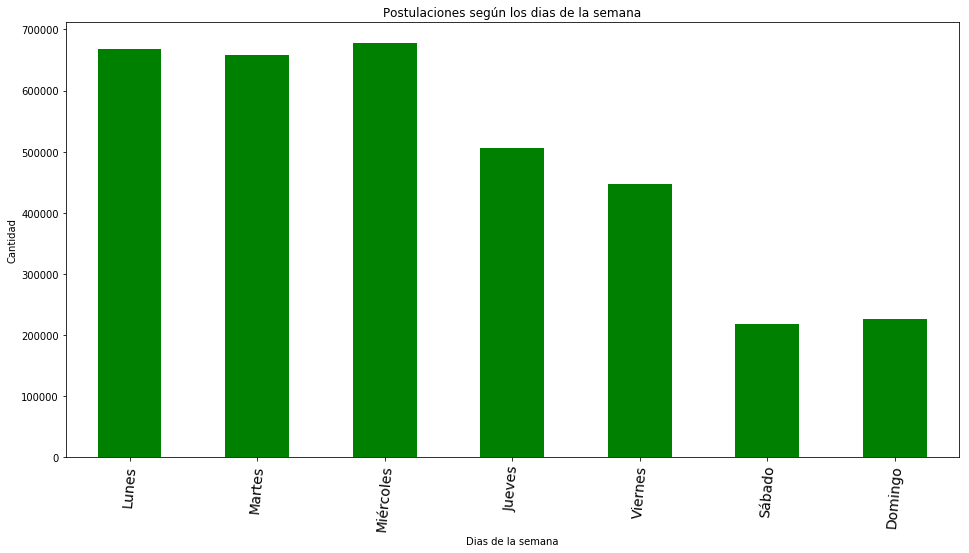

In [12]:
#La cantidad de postulaciones que se recibe por semana
Dia_semana=post.loc[:, ["weekday_", "idaviso"]].groupby("weekday_").count()
Dia_semana.plot(kind='bar',figsize=(16,8),rot=85,title='Postulaciones según los dias de la semana', color="g", legend=False);
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Dias de la semana');
ax.set_xticklabels([r'Lunes', r'Martes', r'Miércoles', r'Jueves', r'Viernes', r"Sábado", r"Domingo"], fontsize=14);




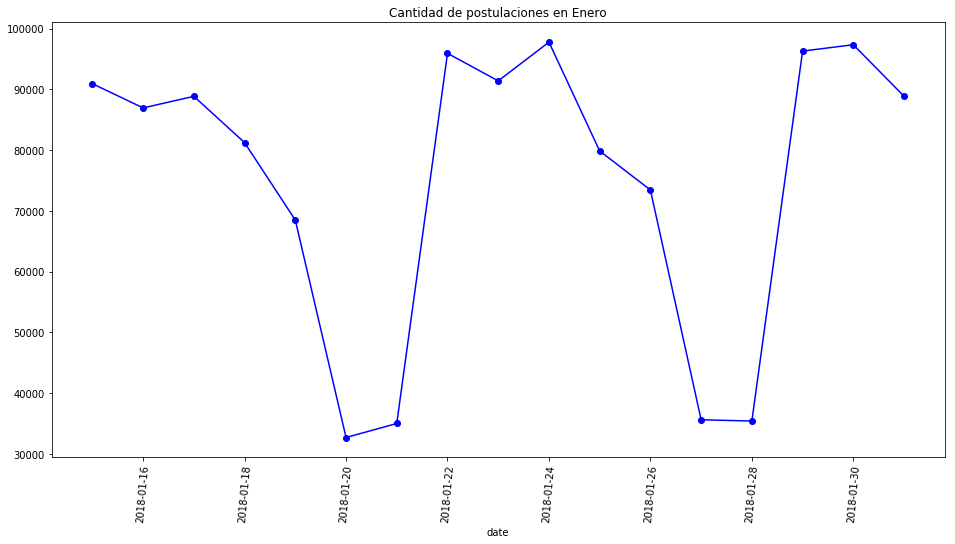

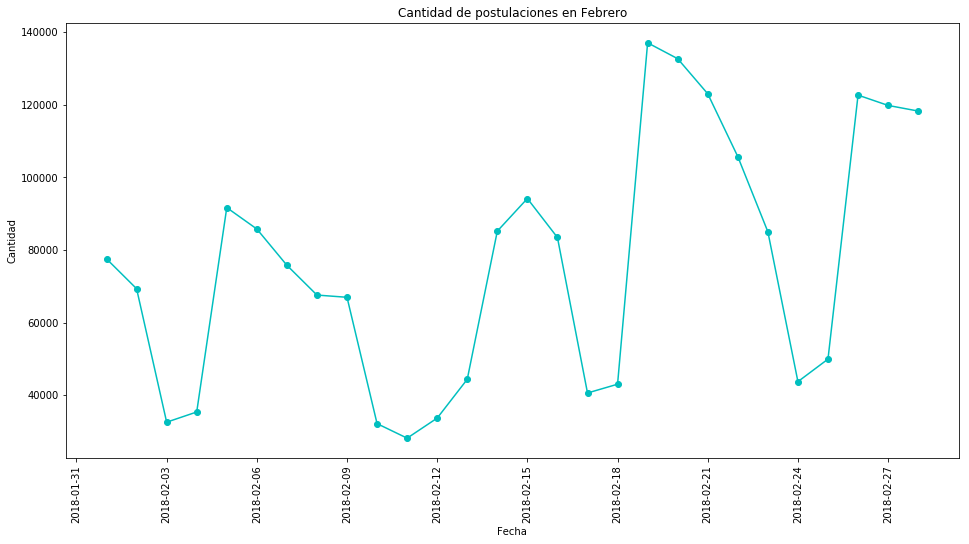

In [13]:
# Como no tenemos el mes de enero completo, vamos a analizar como se distribuye durante el mes, ya que en promedio dan la misma cantidad de postulaciones
post["date"].value_counts()
enero=post[post["month"]==1].loc[:, ["date", "idaviso"]].groupby("date").count()
febrero=post[post["month"]==2].loc[:, ["date", "idaviso"]].groupby("date").count()
enero.plot(figsize=(16, 8), rot=85,title='Cantidad de postulaciones en Enero', color="b", legend=False, marker="o")
febrero.plot(figsize=(16,8),rot=90,title='Cantidad de postulaciones en Febrero', color="c", marker="o", legend= False)
ax=plt.gca()
ax.set_ylabel('Cantidad');
ax.set_xlabel('Fecha');

Text(0,0.5,'Areas')

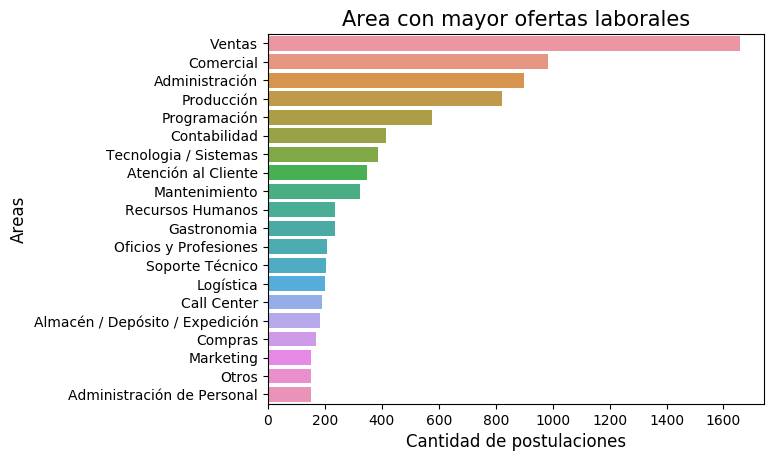

In [27]:
#Averiguar cuál es área de trabajo (nombre_area) sobre la cual se concentra mayor cantidad de ofertas laborales,
#y dentro de esta área, cuál es la zona (nombre_zona) en donde hay mas demanda. 
#idaviso 	idpais 	titulo 	descripcion 	nombre_zona 	ciudad 	mapacalle 	tipo_de_trabajo 	nivel_laboral 	nombre_area 	denominacion_empresa

g = sns.barplot(x=ade["nombre_area"].value_counts().head(20), y=ade["nombre_area"].value_counts().head(20).index, orient='h')
g.set_title("Area con mayor ofertas laborales", fontsize=15)
g.set_xlabel("Cantidad de postulaciones", fontsize=12)
g.set_ylabel("Areas", fontsize=12)


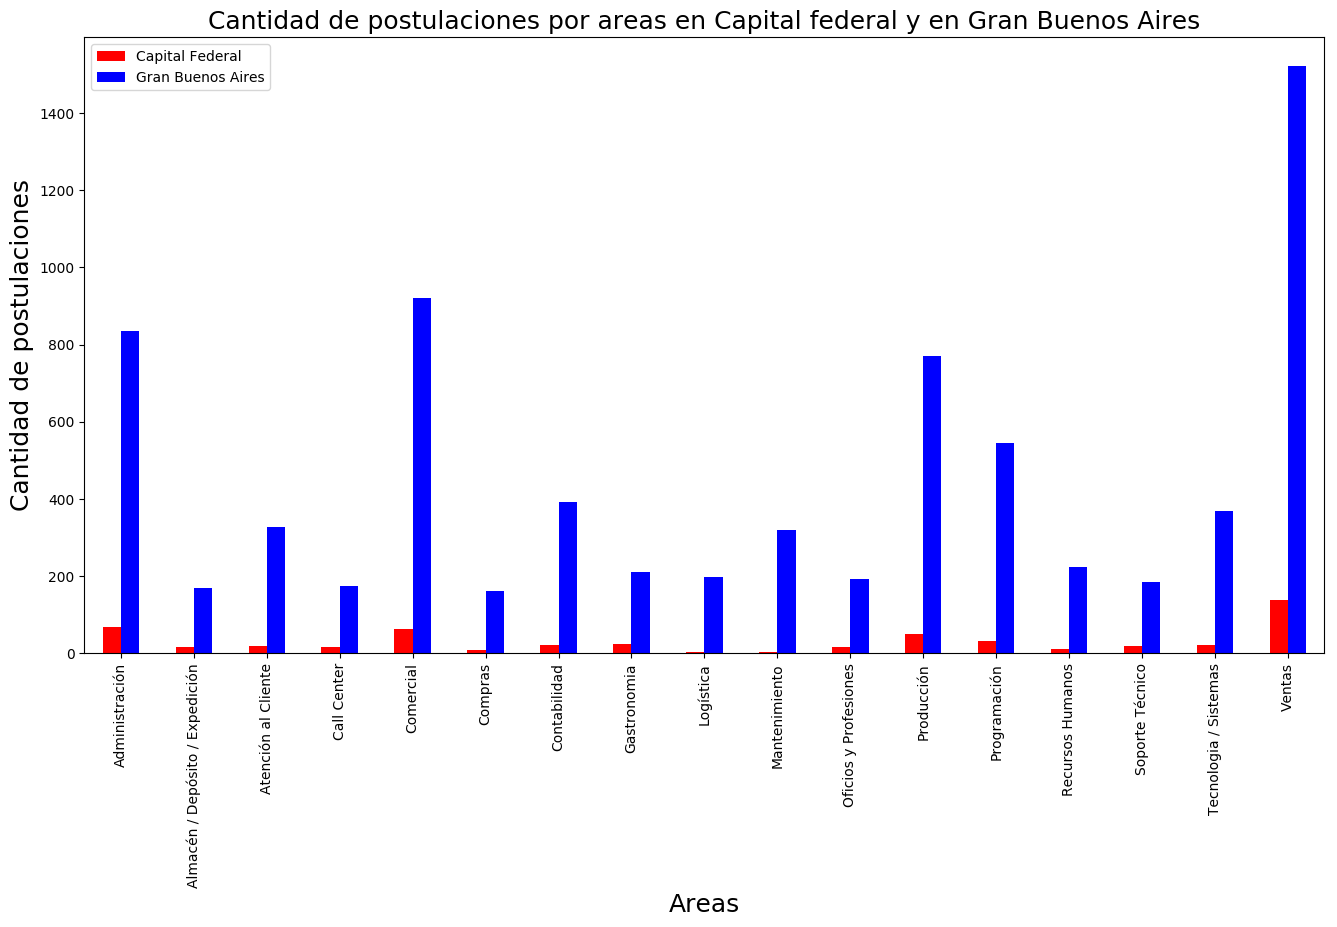

In [188]:

areas = ade.loc[:, ["nombre_area", "nombre_zona", "idaviso", "idpais"]]
capital = areas.loc[areas['nombre_zona'] == 'Capital Federal',('nombre_area', 'idaviso')].groupby('nombre_area').agg(np.size)
provincia = areas.loc[areas['nombre_zona'] == 'Gran Buenos Aires',('nombre_area', 'idpais')].groupby('nombre_area').agg(np.size)
ambos=pd.concat([capital, provincia],axis=1).dropna()
ambos=ambos.rename(columns={"idaviso":"Capital Federal", "idpais":"Gran Buenos Aires"})



ambos[ambos["Gran Buenos Aires"]>=150].plot(kind="bar", figsize=(16,8), color=["r","b"] );

plt.xlabel('Areas', fontsize=18)
plt.ylabel("Cantidad de postulaciones",fontsize=18)
plt.title("Cantidad de postulaciones por areas en Capital federal y en Gran Buenos Aires",fontsize=18);
